Assignment 1

Kummandas Meena

24215011106(AI)

All the activation functions and their derivatives

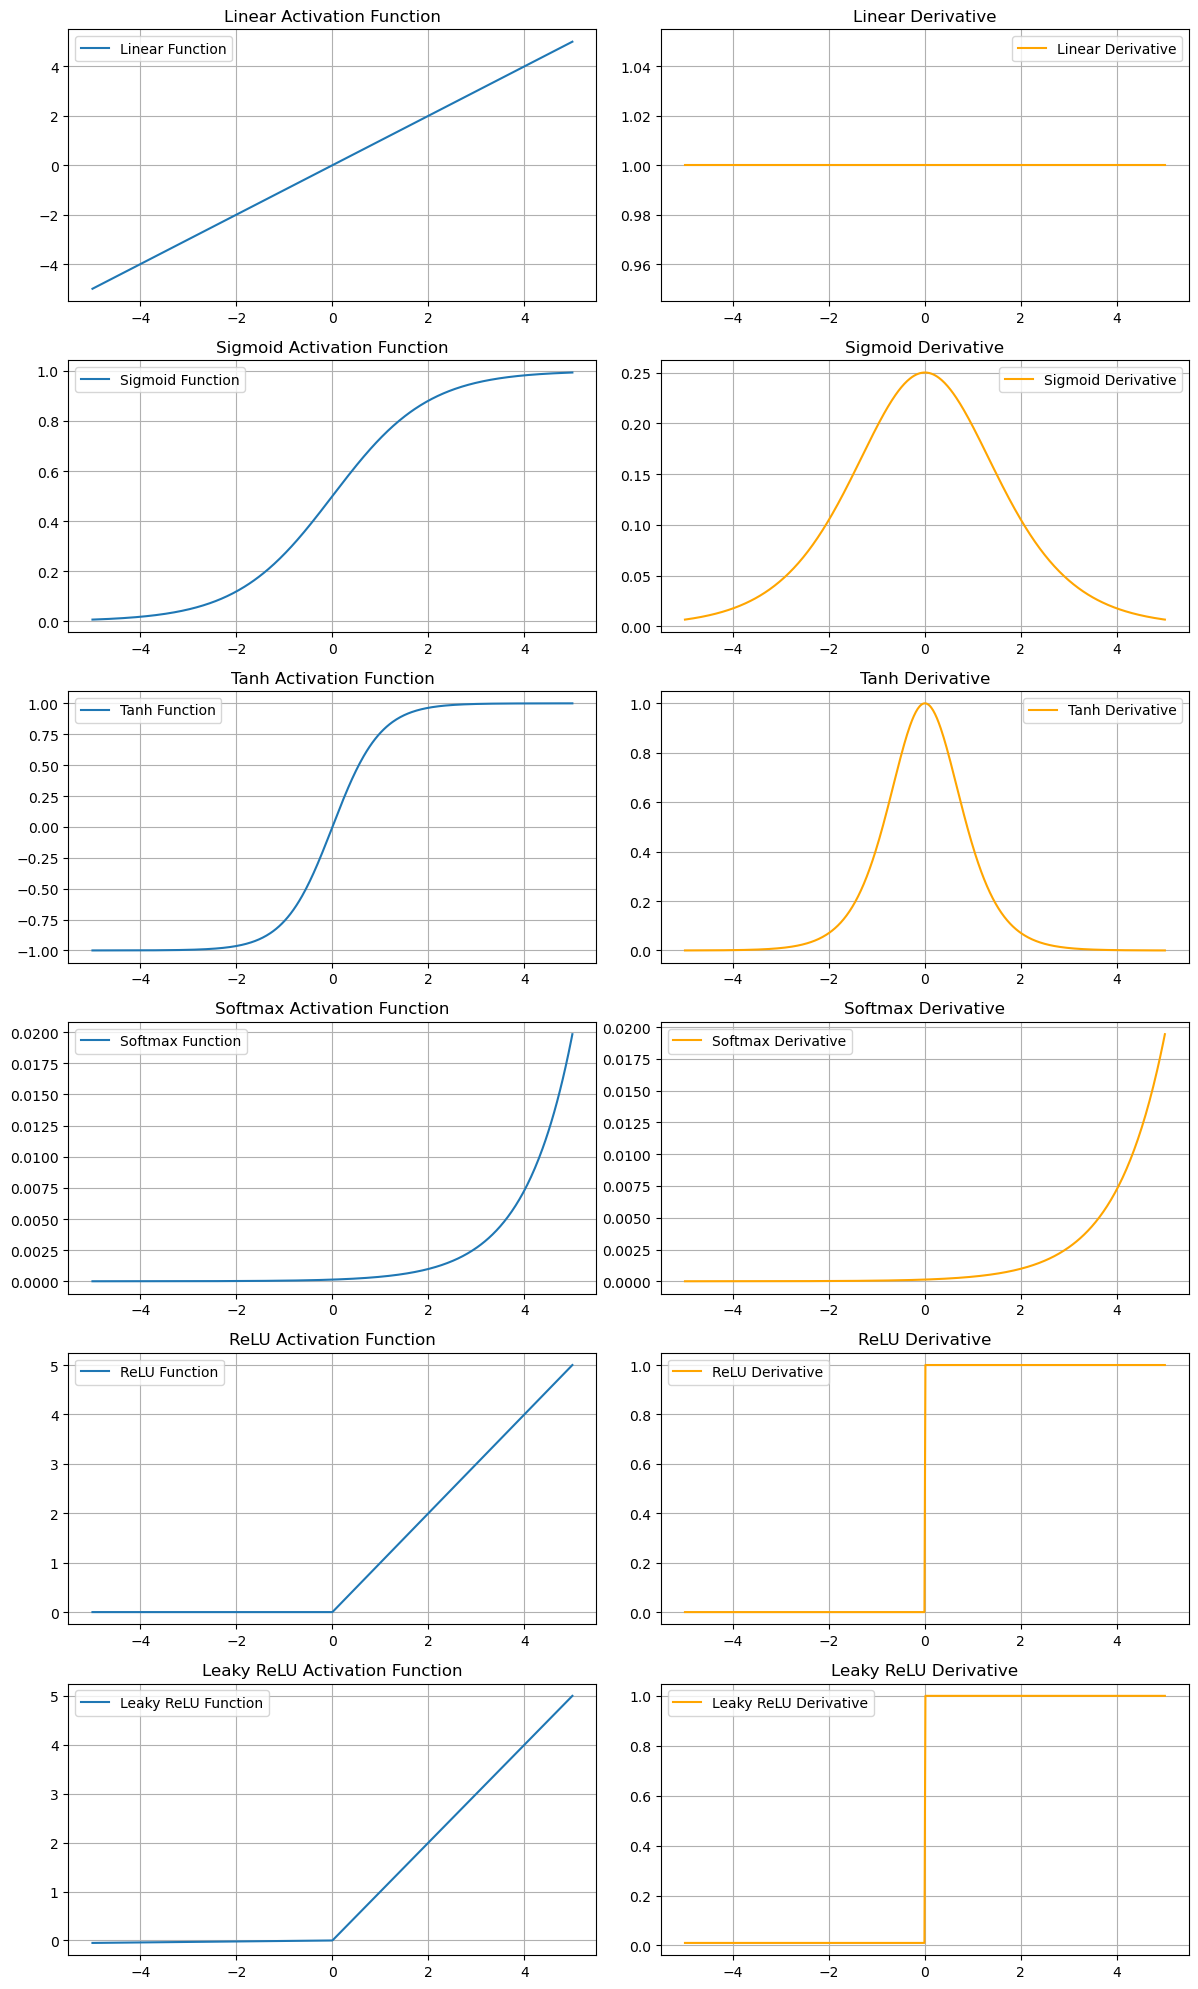

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    e_x = np.exp(x - np.max(x))  # For numerical stability
    return e_x / e_x.sum(axis=0)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)  # Simplified for 1D case, not a full Jacobian

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Generate input range
x = np.linspace(-5, 5, 500)

# Prepare for plotting
activations = {
    "Linear": (linear, linear_derivative),
    "Sigmoid": (sigmoid, sigmoid_derivative),
    "Tanh": (tanh, tanh_derivative),
    "Softmax":(softmax, softmax_derivative),
    "ReLU": (relu, relu_derivative),
    "Leaky ReLU": (leaky_relu, leaky_relu_derivative)
}

# Plot activation functions and their derivatives
fig, axes = plt.subplots(len(activations), 2, figsize=(12, 20))
for i, (name, (func, deriv)) in enumerate(activations.items()):
    # Compute function and derivative values
    y = func(x)
    dydx = deriv(x)
    
    # Plot activation function
    axes[i, 0].plot(x, y, label=f"{name} Function")
    axes[i, 0].set_title(f"{name} Activation Function")
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    
    # Plot derivative
    axes[i, 1].plot(x, dydx, label=f"{name} Derivative", color='orange')
    axes[i, 1].set_title(f"{name} Derivative")
    axes[i, 1].legend()
    axes[i, 1].grid(True)



plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

soil_texture = np.random.uniform(0, 1, num_samples)  # Ratio of sand, silt, and clay
pH = np.random.uniform(4.5, 9.0, num_samples)  # Soil pH levels
moisture_content = np.random.uniform(5, 50, num_samples)  # Percentage moisture
organic_matter = np.random.uniform(1, 10, num_samples)  # Organic matter in %
bulk_density = np.random.uniform(1.1, 1.6, num_samples)  # Soil bulk density in g/cm^3


soil_types = []
for i in range(num_samples):
    if soil_texture[i] > 0.7 and pH[i] > 6.5 and moisture_content[i] < 15:
        soil_types.append("Sandy")
    elif organic_matter[i] > 5 and moisture_content[i] > 30:
        soil_types.append("Loamy")
    else:
        soil_types.append("Clayey")

# Create a DataFrame
data = pd.DataFrame({
    "Soil_Texture": soil_texture,
    "pH": pH,
    "Moisture_Content": moisture_content,
    "Organic_Matter": organic_matter,
    "Bulk_Density": bulk_density,
    "Soil_Type": soil_types
})

# Save the dataset to a CSV file
data.to_csv("synthetic_soil_dataset.csv", index=False)

print("Synthetic dataset created and saved as 'synthetic_soil_dataset.csv'.")


Synthetic dataset created and saved as 'synthetic_soil_dataset.csv'.


Data Preprocessing: 

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the synthetic soil dataset
data = pd.read_csv("synthetic_soil_dataset.csv")

# Introduce some missing values for demonstration purposes
data.iloc[10:15, 2] = np.nan  # Simulate missing values in 'Moisture_Content'

# 1. Handle Missing Data
imputer = SimpleImputer(strategy="mean")  # Replace missing values with the column mean
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])  # Handle numerical columns

# 2. Separate Features and Labels
X = data.iloc[:, :-1].values  # Features (inputs)
y = data.iloc[:, -1].values   # Labels (outputs)

# 3. Encode Categorical Labels (Simple Label Encoding)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Scale the Features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output Preprocessed Data
print("Features after scaling:\n", X_scaled[:5])
print("Encoded Labels:\n", y_encoded[:5])

# Optional: Save the preprocessed data
preprocessed_data = pd.DataFrame(X_scaled, columns=["Soil_Texture", "pH", "Moisture_Content", "Organic_Matter", "Bulk_Density"])
preprocessed_data["Soil_Type"] = y_encoded
preprocessed_data.to_csv("preprocessed_soil_dataset.csv", index=False)

print("\nPreprocessed data saved as 'preprocessed_soil_dataset.csv'.")


Features after scaling:
 [[-0.39630103 -1.10217857 -0.83490537  0.63673984  0.2717114 ]
 [ 1.57695733  0.11944663 -0.8858098   1.06970686  1.08602506]
 [ 0.82789256  1.25299211  1.39301993 -0.83782241  0.92810149]
 [ 0.37125061  0.77114327 -0.87693542  0.46970805 -1.18676377]
 [-1.14468466  1.02568136 -0.79949617  0.28416991 -1.20298622]]
Encoded Labels:
 [0 0 0 0 0]

Preprocessed data saved as 'preprocessed_soil_dataset.csv'.


In [6]:
datset = pd.read_csv('preprocessed_soil_dataset.csv')

2.Train-Test Split:

In [7]:
from sklearn.model_selection import train_test_split

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Output the shapes of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")


Training Features Shape: (800, 5)
Test Features Shape: (200, 5)
Training Labels Shape: (800,)
Test Labels Shape: (200,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the Sequential model
model = Sequential([
    # First hidden layer with 64 neurons and ReLU activation
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    Dropout(0.3),  # Dropout with a rate of 30%
    
    # Second hidden layer with 32 neurons and ReLU activation
    Dense(32, activation='relu'),
    Dropout(0.3),  # Dropout with a rate of 30%
    
    # Output layer for classification
    Dense(len(set(y_encoded)), activation='softmax')  # Adjust output neurons based on the number of classes
])

# Print model summary
model.summary()


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,563 (10.01 KB)

 Trainable params: 2,563 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a default learning rate of 0.001
    loss='sparse_categorical_crossentropy',  # Loss function for integer-labeled multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

print("Model compiled successfully!")


Model compiled successfully!


In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9283 - loss: 0.1559 - val_accuracy: 0.9700 - val_loss: 0.1012
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9596 - loss: 0.1417 - val_accuracy: 0.9650 - val_loss: 0.0995
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9601 - loss: 0.1201 - val_accuracy: 0.9700 - val_loss: 0.1011
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9377 - loss: 0.1352 - val_accuracy: 0.9700 - val_loss: 0.0975
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9455 - loss: 0.1385 - val_accuracy: 0.9650 - val_loss: 0.0974
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9457 - loss: 0.1391 - val_accuracy: 0.9750 - val_loss: 0.0988
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9503 - loss: 0.1243 - val_accuracy: 0.9750 - val_loss: 0.0952
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9496 - loss: 0.1230 - val_accuracy: 0.9700 - v

In [31]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9756 - loss: 0.1593
Test Loss: 0.0951
Test Accuracy: 0.9800


In [32]:
# Extract training and validation metrics
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
training_loss = history.history['loss'][-1]
validation_loss = history.history['val_loss'][-1]

print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)


Training Accuracy: 0.9662500023841858
Validation Accuracy: 0.9800000190734863
Training Loss: 0.07806619256734848
Validation Loss: 0.09511351585388184


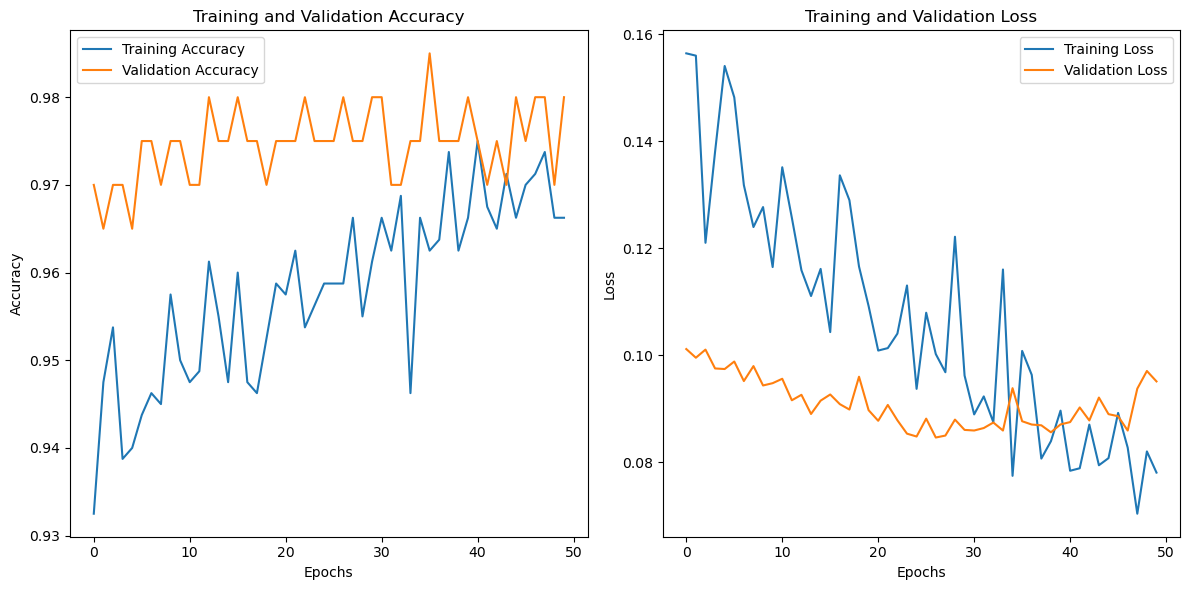

In [33]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [23]:
# Save the entire model to a file
model.save("soil_classification_model.h5")
print("Model saved as 'soil_classification_model.h5'")


Model saved as 'soil_classification_model.h5'


In [24]:
from tensorflow.keras.models import load_model

# Load the model from the file
loaded_model = load_model("soil_classification_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [16]:
# Evaluate the loaded model on the test set
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Accuracy: {accuracy:.2f}")

# Make predictions with the loaded model
new_soil_data = np.array([[2, 6.5, 15.0, 3.5, 1.2]])  # Example new data
new_soil_data_scaled = scaler.transform(new_soil_data)
predictions = loaded_model.predict(new_soil_data_scaled)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted Soil Type:", predicted_class)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9262 - loss: 0.2066 
Loaded Model Accuracy: 0.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Predicted Soil Type: [0]


In [17]:
import os

# Get the file size of the saved model
model_file = "soil_classification_model.h5"

# Check if the file exists
if os.path.exists(model_file):
    model_size = os.path.getsize(model_file) / (1024 * 1024)  # Convert bytes to MB
    print(f"Model size: {model_size:.2f} MB")
else:
    print(f"Model file '{model_file}' not found. Please save the model first.")


Model size: 0.06 MB
